<a href="https://colab.research.google.com/github/gitmystuff/DTSC4050/blob/main/Week_07-AB_Testing/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences about a population based on evidence from a sample. It's a way to determine whether there's enough evidence to reject a null hypothesis, which is a statement of no effect or no difference.

Here's a breakdown of the key components:

**1. Hypotheses:**

* **Null Hypothesis (H0):** This is the default assumption, stating that there's no effect, no difference, or no relationship between variables.
* **Alternative Hypothesis (Ha or H1):** This contradicts the null hypothesis and proposes the effect or relationship you're interested in investigating.

**2. Data Collection:**

* You collect data from a sample of the population.

**3. Test Statistic:**

* You calculate a test statistic, which measures how far your sample data deviates from what you'd expect if the null hypothesis were true.

**4. P-value:**

* You determine the p-value, which is the probability of observing your sample data (or more extreme data) if the null hypothesis were actually true.

**5. Decision:**

* You compare the p-value to a significance level (alpha), typically set at 0.05.
* If the p-value is less than alpha, you reject the null hypothesis, suggesting that there's evidence to support the alternative hypothesis.
* If the p-value is greater than or equal to alpha, you fail to reject the null hypothesis, meaning there's not enough evidence to support the alternative hypothesis.

**In simpler terms:**

Imagine you're trying to determine if a new drug is effective. Your null hypothesis would be that the drug has no effect. You'd conduct a study, collect data, and perform a hypothesis test. If the results show a very low probability of getting those results if the drug truly had no effect, you'd reject the null hypothesis and conclude that the drug likely *does* have an effect.

**Key Uses:**

* **A/B testing:** Comparing two versions of something to see which performs better.
* **Scientific research:** Testing hypotheses about relationships between variables.
* **Medical trials:** Determining if a new treatment is effective.
* **Business decisions:** Evaluating the impact of a new strategy or product.

Hypothesis testing helps you make data-driven decisions by providing a framework for evaluating evidence and drawing conclusions.



## Degrees of Freedom

Degrees of freedom (df) are a crucial concept when dealing with t-distributions and hypothesis testing. They represent the number of independent pieces of information available to estimate a parameter.

Here's why degrees of freedom are relevant:

**1. Shape of the t-distribution:**

The t-distribution is a family of distributions that vary in shape depending on the degrees of freedom.

* **Low df:** With fewer degrees of freedom (smaller sample sizes), the t-distribution has heavier tails and a lower peak compared to the standard normal distribution. This reflects greater uncertainty due to limited sample data.
* **High df:** As degrees of freedom increase (larger sample sizes), the t-distribution approaches the standard normal distribution. This is because with more data, we have more information and greater certainty about the population parameters.

**2. Critical values and p-values:**

When performing hypothesis tests with t-distributions, the critical values and p-values depend on the degrees of freedom.

* **Critical values:** The critical t-value that separates the rejection region from the non-rejection region is determined by the degrees of freedom and the chosen significance level.
* **p-values:** The p-value, which represents the probability of observing data as extreme as ours if the null hypothesis were true, is also calculated based on the degrees of freedom and the t-statistic.

**3. Accurate inferences:**

Using the correct degrees of freedom ensures that we make accurate inferences about the population based on our sample data. If we use the wrong degrees of freedom, we may end up with incorrect critical values, p-values, and ultimately, wrong conclusions about our hypotheses.

**In the context of your die roll example:**

The degrees of freedom (df = 19, since you had 20 rolls) influence the shape of the t-distribution used to analyze your data. This, in turn, affects the critical t-value and the p-value, which are used to determine whether your die is fair or biased.

**In essence:**

Degrees of freedom reflect the amount of information available in your data. By accounting for degrees of freedom, we can make more accurate and reliable inferences about the population we're studying.

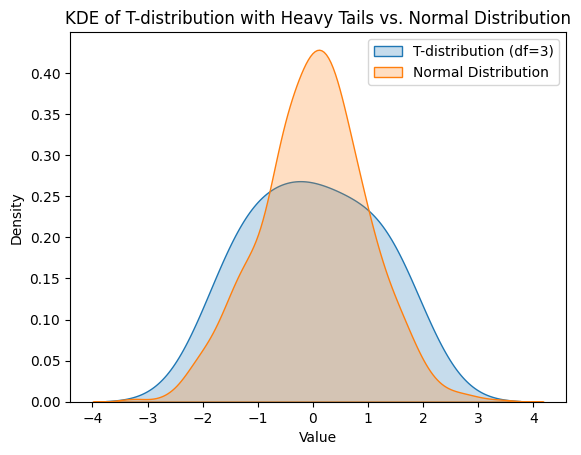

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data from a t-distribution with heavy tails (low degrees of freedom)
df = 3  # Degrees of freedom (lower df = heavier tails)
t_data = np.random.standard_t(df, size=10)

# Generate data from a standard normal distribution
normal_data = np.random.normal(size=1000)

# Plot KDEs
sns.kdeplot(t_data, label=f"T-distribution (df={df})", fill=True)
sns.kdeplot(normal_data, label="Normal Distribution", fill=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("KDE of T-distribution with Heavy Tails vs. Normal Distribution")
plt.legend()
plt.show()

A t-distribution has heavier tails than a normal distribution due to its higher degree of uncertainty or variability. This higher variability stems from the fact that it is used when the population standard deviation is unknown and must be estimated from the sample.

Here's a breakdown of why this happens:

1. **Estimating the Standard Deviation:** When the population standard deviation is unknown, we use the sample standard deviation (s) as an estimate. However, s is itself a random variable and subject to variability.

2. **Increased Uncertainty:** This estimation of the standard deviation introduces additional uncertainty into the distribution. This uncertainty leads to a wider spread of the data, including more extreme values in the tails.

3. **Degrees of Freedom:** The shape of the t-distribution is also influenced by the degrees of freedom (df), which are related to the sample size. Smaller sample sizes (and lower df) result in even heavier tails because there's less information to accurately estimate the population standard deviation.

4. **Impact on Tails:** The combination of estimating the standard deviation and lower degrees of freedom causes the t-distribution to have more probability mass in the tails compared to the normal distribution. This means that there's a higher chance of observing extreme values when sampling from a population where the standard deviation is unknown.

**In simpler terms:**

Imagine you're trying to estimate the average height of all students in a school, but you can only measure a small sample. Because you don't know the true variability in heights across the entire school, your estimate will be less precise. This lack of precision translates to a wider distribution with heavier tails, as there's a greater chance of encountering unusually tall or short students in your small sample.

**Key takeaway:**

The heavier tails of the t-distribution reflect the increased uncertainty when working with samples and estimating population parameters. This is why it's important to use the t-distribution instead of the normal distribution when the population standard deviation is unknown, especially for small sample sizes.

## Confidence Intervals

Informally, in frequentist statistics, a confidence interval (CI) is an interval which is expected to typically contain the parameter being estimated. More specifically, given a confidence level
(95% and 99% are typical values), a CI is a random interval which contains the parameter being estimated a % of the time.

https://en.wikipedia.org/wiki/Confidence_interval

## Significance Level

In statistical hypothesis testing, the significance level, often denoted by the Greek letter alpha (α), is a crucial concept. Here's a breakdown:

**Core Definition:**

* The significance level is the probability of rejecting the null hypothesis when it is actually true. In simpler terms, it's the risk you're willing to take of making a "false positive" conclusion.
* A "false positive" (also known as a Type I error) occurs when you conclude that there is a statistically significant effect when, in reality, there is no such effect.

**Key Points:**

* **Threshold:**
    * The significance level acts as a threshold. If the probability of observing your results (or more extreme results) under the null hypothesis (the p-value) is less than the significance level, you reject the null hypothesis.
* **Common Values:**
    * The most commonly used significance level is 0.05 (or 5%). This means there's a 5% chance of rejecting the null hypothesis when it's true.
    * Other common values include 0.01 (1%) and 0.10 (10%).
* **Researcher's Choice:**
    * The choice of significance level depends on the context of the study and the consequences of making a Type I error.
    * In situations where a false positive could have serious consequences (e.g., medical research), a lower significance level (e.g., 0.01) is often used.
* **Relationship to P-value:**
    * The p-value is the probability of obtaining the observed results (or more extreme results) if the null hypothesis is true.
    * If the p-value is less than or equal to the significance level (p ≤ α), you reject the null hypothesis.

**In essence:**

* The significance level helps researchers determine whether their findings are statistically significant, meaning they are unlikely to have occurred by chance.


## The p-Value

The p-value is a fundamental concept in statistical hypothesis testing. It quantifies the strength of evidence against the null hypothesis. Here's a comprehensive explanation:

**Definition:**

* The p-value is the probability of obtaining results as extreme as, or more extreme than, the observed results, assuming the null hypothesis is true.
* In simpler terms, it measures how likely your observed data is if the null hypothesis were correct.

**Key Points:**

* **Probability:**
    * The p-value is a probability, so it ranges from 0 to 1.
* **Null Hypothesis:**
    * It's calculated under the assumption that the null hypothesis is true.
* **Extreme Results:**
    * "Extreme" is defined relative to the hypothesis being tested. If it is a two tailed test, extreme means far away from the mean in either direction. If it is a one tailed test, extreme means far away from the mean in the direction of the alternative hypothesis.
* **Decision Rule:**
    * The p-value is compared to the significance level (alpha, α) to make a decision:
        * If p ≤ α, reject the null hypothesis.
        * If p > α, fail to reject the null hypothesis.
* **Strength of Evidence:**
    * A small p-value (e.g., p < 0.05) indicates strong evidence against the null hypothesis.
    * A large p-value (e.g., p > 0.05) indicates weak evidence against the null hypothesis. It does *not* mean the null hypothesis is true.

**How to Interpret the P-value:**

* **Small P-value (e.g., p < 0.05):**
    * The observed results are unlikely to have occurred by chance alone if the null hypothesis were true.
    * This provides evidence to reject the null hypothesis in favor of the alternative hypothesis.
* **Large P-value (e.g., p > 0.05):**
    * The observed results are reasonably likely to have occurred by chance alone if the null hypothesis were true.
    * This does not provide sufficient evidence to reject the null hypothesis.
    * It is very important to reiterate that failure to reject the null hypothesis does not mean that it is true.

**Example:**

* Suppose you're testing whether a new drug improves reaction time.
* Null hypothesis: The drug has no effect on reaction time.
* Alternative hypothesis: The drug improves reaction time.
* You conduct an experiment and calculate a p-value of 0.02.
* Interpretation: There's a 2% chance of observing the results you obtained if the drug had no effect. Since 0.02 is less than 0.05, you reject the null hypothesis and conclude that the drug likely improves reaction time.

**Important Considerations:**

* **P-value is not the probability that the null hypothesis is true.** It's the probability of the observed data given the null hypothesis is true.
* **Statistical significance does not equal practical significance.** A statistically significant result may not be meaningful in a real-world context.
* **P-values should be interpreted in the context of the study design and other relevant factors.**


## Alpha and p-Value

The relationship between alpha (α), the significance level, and the p-value is fundamental to hypothesis testing. Here's a clear explanation:

**Core Relationship: Comparison for Decision-Making**

The key is that you *compare* the p-value to alpha to make a decision about whether to reject the null hypothesis.

**Here's how it works:**

1.  **Alpha (α): The Significance Level**

    * Alpha is the predetermined threshold for statistical significance. It represents the maximum probability of making a Type I error (rejecting a true null hypothesis) that you are willing to accept.
    * Common values are 0.05, 0.01, and 0.10.
    * Alpha is set *before* conducting the hypothesis test.

2.  **P-value: The Probability of Observed Results**

    * The p-value is calculated *after* conducting the hypothesis test.
    * It represents the probability of obtaining the observed results (or more extreme results) if the null hypothesis were true.

3.  **The Decision Rule: Comparing P-value and Alpha**

    * **If the p-value is less than or equal to alpha (p ≤ α):**
        * This means the observed results are unlikely to have occurred by chance alone if the null hypothesis were true.
        * Therefore, you **reject the null hypothesis**.
        * The results are considered statistically significant.
    * **If the p-value is greater than alpha (p > α):**
        * This means the observed results are reasonably likely to have occurred by chance alone if the null hypothesis were true.
        * Therefore, you **fail to reject the null hypothesis**.
        * The results are not considered statistically significant.

**In simpler terms:**

* Alpha is the "line in the sand" you draw before the test. It defines how much risk you're willing to take of being wrong when you reject the null hypothesis.
* The p-value tells you where your data falls in relation to that line.
* If your data falls "on the wrong side" of the line (p ≤ α), you reject the null hypothesis.
* If your data falls "on the correct side" of the line (p > α), you fail to reject the null hypothesis.

**Example:**

* Alpha = 0.05
* P-value = 0.03
* Decision: Since 0.03 ≤ 0.05, you reject the null hypothesis.

* Alpha = 0.05
* P-value = 0.10
* Decision: Since 0.10 > 0.05, you fail to reject the null hypothesis.


## Critical Value

The critical value is a crucial concept in hypothesis testing, acting as a threshold for determining statistical significance. Here's a breakdown:

**Core Definition:**

* The critical value is a point (or points) on the scale of the test statistic beyond which we reject the null hypothesis.
* It's determined by the chosen significance level (alpha) and the distribution of the test statistic (e.g., z-distribution, t-distribution).

**How It Works:**

1.  **Significance Level (Alpha):**
    * The significance level (α) represents the probability of a Type I error (rejecting a true null hypothesis).
2.  **Test Statistic:**
    * A test statistic (e.g., z-score, t-score) is calculated from the sample data to measure how far the sample result deviates from the null hypothesis.
3.  **Distribution:**
    * The test statistic follows a specific probability distribution (e.g., standard normal distribution, t-distribution).
4.  **Critical Region:**
    * The critical value(s) define the boundaries of the critical region (or rejection region).
    * If the calculated test statistic falls within the critical region, we reject the null hypothesis.
5.  **Decision:**
    * If the absolute value of the calculated test statistic is greater than or equal to the critical value, we reject the null hypothesis.
    * If the absolute value of the calculated test statistic is less than the critical value, we fail to reject the null hypothesis.

**Types of Critical Values:**

* **Two-tailed test:**
    * There are two critical values, one in each tail of the distribution.
    * Used when testing for differences in either direction.
* **One-tailed test:**
    * There is one critical value, located in either the right or left tail of the distribution.
    * Used when testing for differences in a specific direction (e.g., greater than or less than).

**Example:**

* In a two-tailed z-test with a 95% confidence level (α = 0.05), the critical values are ±1.96.
* If the calculated z-score is 2.5, it falls within the critical region (beyond 1.96), so we reject the null hypothesis.
* If the calculated z score was 1.5 it would not fall within the critical region, so we would fail to reject the null hypothesis.

**In summary:**

* The critical value acts as a dividing line, helping us decide whether our sample data provides enough evidence to reject the null hypothesis.
* It is directly related to the significance level, and the type of test being conducted.


## The Critical Value and the Test Statistic

The critical value and the test statistic work together to determine whether to reject the null hypothesis in a hypothesis test. Here's how they relate:

**The Core Relationship: Comparison**

The fundamental relationship is a *comparison*. You compare the calculated test statistic to the critical value(s) to make a decision.

**Here's a breakdown:**

1.  **Test Statistic:**
* The test statistic is a value calculated from your sample data. It summarizes how far your sample data deviates from what the null hypothesis predicts.
* Examples: z-score, t-score, F-statistic, chi-square statistic.
* z population: $z = \frac{x - \mu}{\sigma}$
* z sample: $z = \frac{x - \bar{x}}{s}$
* The t-score is used when the population standard deviation is unknown and the sample size is small. It represents the number of standard errors a sample mean is from the population mean. The formula for the t-score is:
* $t = \frac{\bar{x} - \mu}{s / \sqrt{n}}$

The degrees of freedom influence the critical values used in hypothesis testing with the t-distribution. As the degrees of freedom increase, the t-distribution approaches the standard normal (z) distribution.

* **T-score formula:**
  * The t-score formula calculates the test statistic (t-value). It tells you how many standard errors the sample mean is away from the population mean.
  * `t = (x̄ - μ) / (s / √n)`
  * This formula does not contain "df."

* **Degrees of Freedom (df):**
  * The degrees of freedom determine the *shape* of the t-distribution.
  * The t-distribution is a family of distributions, and the df specify which particular distribution to use.
  * For a one-sample t-test, df = n - 1 (sample size minus 1).
  * **Where df is used:**
      * **Finding critical values:** When you look up critical t-values in a t-table or use a statistical function (like `scipy.stats.t.ppf()` in Python), you need to provide the degrees of freedom.
      * **Calculating p-values:** When you calculate the p-value associated with your t-score, you also need to provide the degrees of freedom.

* **Relationship:**
  * The t-score is the test statistic.
  * The degrees of freedom are a parameter that determines the appropriate t-distribution to use for interpreting that test statistic.
  * The df are used to find where the t score falls on the t distribution.

**In essence:**

* The t-score tells you *where* your sample mean falls on the t-distribution.
* The degrees of freedom tell you *which* t-distribution to use.

Therefore, while "df" is not in the t-score formula, it is indispensable when you take that t-score and use it to perform statistical inference.

2.  **Critical Value:**
* The critical value is a threshold determined by:
    * The chosen significance level (alpha).
    * The type of hypothesis test (one-tailed or two-tailed).
    * The distribution of the test statistic.
* It defines the boundaries of the "critical region" or "rejection region."

3.  **Comparison and Decision:**
* **If the absolute value of the test statistic is greater than or equal to the critical value:**
    * The test statistic falls within the critical region.
    * This means the sample data provides strong evidence against the null hypothesis.
    * You **reject the null hypothesis**.
    * Essentially, the data is far enough from what the null hypothesis predicts that it is unlikely to have occured by random chance.
* **If the absolute value of the test statistic is less than the critical value:**
    * The test statistic does not fall within the critical region.
    * The sample data does not provide enough evidence to reject the null hypothesis.
    * You **fail to reject the null hypothesis**.
    * The data is not far enough away from the null hypothesis to say that the null hypothesis is likely false.

**Visualizing the Relationship:**

Imagine a bell curve (like a standard normal distribution):

* The critical values are like lines drawn on the x-axis, marking off the tails of the distribution.
* The test statistic is a point on the x-axis, representing your sample data.
* If the point falls beyond the lines (in the tails), you reject the null hypothesis. If it falls between the lines, you fail to reject.

**In simpler terms:**

* The critical value sets the "bar" for how extreme your sample data needs to be to be considered statistically significant.
* The test statistic tells you how extreme your sample data actually is.
* If your data is more extreme than the bar, you reject the null hypothesis.


## The Standard Error

**Understanding the Z-test**

The z-test is used to compare a sample mean (x̄) to a population mean (μ) when you know the population standard deviation (σ). The goal is to determine if the sample mean is significantly different from the population mean.

**The Role of Standard Error**

* **Sampling Distribution:** When you take multiple samples from a population, the sample means will vary. This distribution of sample means is called the sampling distribution of the mean.
* **Standard Error:** The standard error of the mean (SEM) is the standard deviation of the sampling distribution of the mean. It quantifies how much the sample means are expected to vary from the population mean.
* **Formula for SEM:** SEM = σ / √n
    * σ (sigma) is the population standard deviation.
    * n is the sample size.

**Why Divide by √n?**

* **Larger Sample Size, Less Variability:** As the sample size (n) increases, the standard error decreases. This makes sense because larger samples tend to provide more accurate estimates of the population mean, leading to less variability in the sample means.
* **Central Limit Theorem:** The Central Limit Theorem states that as the sample size increases, the sampling distribution of the mean approaches a normal distribution, regardless of the shape of the original population distribution. This is why we can use the z-distribution (standard normal distribution) for the z-test when the sample size is sufficiently large.

**Z-test Formula and Standard Error**

The z-test formula is:

```
z = (x̄ - μ) / (σ / √n)
```

By dividing by the standard error (σ / √n), we're essentially standardizing the difference between the sample mean and the population mean. This allows us to compare the difference to the standard normal distribution and determine how likely it is to observe such a difference by chance alone.

**In Summary**

The standard error of the mean (σ / √n) is a crucial component of the z-test formula. It accounts for the variability of sample means and allows us to standardize the difference between the sample mean and the population mean, enabling us to use the z-distribution for hypothesis testing.

## Example 1

**1. Z-test (Standard Normal Distribution)**

* **Formula:**
    ```
    z = (x̄ - μ) / (σ / √n)
    ```
    where:
    * z is the z-score (test statistic)
    * x̄ is the sample mean
    * μ is the population mean (or hypothesized mean)
    * σ is the population standard deviation
    * n is the sample size

* **Example:**
    Let's say you're testing whether the average height of a certain plant species is different from 10 cm. You collect a sample of 25 plants and find a sample mean of 11 cm with a population standard deviation of 2 cm. To get a test statistic of 2.5:

    ```
    2.5 = (11 - 10) / (2 / √25)
    ```

**2. T-test (T-distribution)**

* **Formula:**
    ```
    t = (x̄ - μ) / (s / √n)
    ```
    where:
    * t is the t-score (test statistic)
    * x̄ is the sample mean
    * μ is the population mean (or hypothesized mean)
    * s is the sample standard deviation
    * n is the sample size

* **Example:**
    Similar to the z-test example, but now you don't know the population standard deviation. You find a sample standard deviation of 2.5 cm. To get a test statistic of 2.5:

    ```
    2.5 = (11 - 10) / (2.5 / √25)
    ```

**Important Notes:**

* In both examples, I manipulated the values to achieve a test statistic of 2.5. In real-world scenarios, you would calculate the test statistic based on your actual sample data.
* The choice of z-test or t-test depends on whether you know the population standard deviation and the sample size.
* The interpretation of the test statistic (2.5 in this case) depends on the context of the hypothesis test, the significance level, and whether it's a one-tailed or two-tailed test.


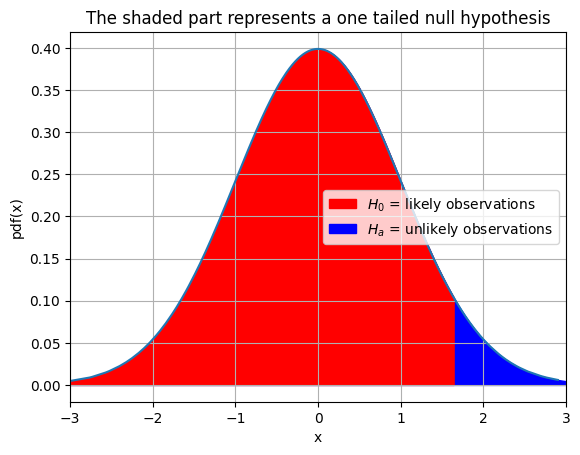

In [ ]:
# example of one tailed hypothesis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

X = stats.norm.rvs(size=1000)
X.sort()
fig, ax = plt.subplots()

ax.plot(X, stats.norm.pdf(X, loc=0, scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-3, 1.645, 0.01)
ax.set_xlim(-3, 3)
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
ax.fill_between(px,stats.norm.pdf(px, loc=0, scale=1), color='r')
plt.title('The shaded part represents a one tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [ ]:
import scipy.stats as stats

# Parameters
alpha = 0.05  # Significance level (95% CI)
degrees_of_freedom = 29  # Example degrees of freedom (n=30)

# Critical Value for Right-Tailed Test
critical_value = stats.t.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Critical Value: {critical_value:.3f}")

# Example 1: Test Statistic Greater Than Critical Value (Reject Null)
test_statistic_greater = 2.5  # Example test statistic
print(f"Test Statistic (Greater): {test_statistic_greater:.3f}")

if test_statistic_greater > critical_value:
    print("Reject the null hypothesis (test statistic > critical value)")
else:
    print("Fail to reject the null hypothesis (test statistic <= critical value)")

p_value_greater = 1 - stats.t.cdf(test_statistic_greater, df = degrees_of_freedom)
print(f"P-value: {p_value_greater:.4f}")



Critical Value: 1.699
Test Statistic (Greater): 2.500
Reject the null hypothesis (test statistic > critical value)
P-value: 0.0092


In [ ]:
import scipy.stats as stats

# Parameters
alpha = 0.05  # Significance level (95% CI)
degrees_of_freedom = 999  # Example degrees of freedom (n=1000)

# Critical Value for Right-Tailed Test
critical_value = stats.t.ppf(1 - alpha, df=degrees_of_freedom)

print(f"Critical Value: {critical_value:.3f}")

# Example 1: Test Statistic Greater Than Critical Value (Reject Null)
test_statistic_greater = 2.5  # Example test statistic
print(f"Test Statistic (Greater): {test_statistic_greater:.3f}")

if test_statistic_greater > critical_value:
    print("Reject the null hypothesis (test statistic > critical value)")
else:
    print("Fail to reject the null hypothesis (test statistic <= critical value)")

p_value_greater = 1 - stats.t.cdf(test_statistic_greater, df = degrees_of_freedom)
print(f"P-value: {p_value_greater:.4f}")

Critical Value: 1.646
Test Statistic (Greater): 2.500
Reject the null hypothesis (test statistic > critical value)
P-value: 0.0063


## Example 2

In [ ]:
# Example 2: Test Statistic Less Than Critical Value (Fail to Reject Null)
test_statistic_less = 1.5  # Example test statistic
print(f"Test Statistic (Less): {test_statistic_less:.3f}")

if test_statistic_less > critical_value:
    print("Reject the null hypothesis (test statistic > critical value)")
else:
    print("Fail to reject the null hypothesis (test statistic <= critical value)")

p_value_less = 1 - stats.t.cdf(test_statistic_less, df = degrees_of_freedom)
print(f"P-value: {p_value_less:.4f}")

#Z test examples.
critical_z = stats.norm.ppf(1 - alpha)
# critical_value = stats.t.ppf(1 - alpha, df=degrees_of_freedom)
print(f"Critical Z Value: {critical_z:.3f}")

test_z_greater = 2.5
print(f"Test Z Statistic (Greater): {test_z_greater:.3f}")
if test_z_greater > critical_z:
    print("Reject the null hypothesis (test statistic > critical value)")
else:
    print("Fail to reject the null hypothesis (test statistic <= critical value)")

p_value_z_greater = 1 - stats.norm.cdf(test_z_greater)
print(f"P-value: {p_value_z_greater:.4f}")

test_z_less = 1.5
print(f"Test Z Statistic (Less): {test_z_less:.3f}")

if test_z_less > critical_z:
    print("Reject the null hypothesis (test statistic > critical value)")
else:
    print("Fail to reject the null hypothesis (test statistic <= critical value)")
p_value_z_less = 1 - stats.norm.cdf(test_z_less)
print(f"P-value: {p_value_z_less:.4f}")

Test Statistic (Less): 1.500
Fail to reject the null hypothesis (test statistic <= critical value)
P-value: 0.0722
Critical Z Value: 1.645
Test Z Statistic (Greater): 2.500
Reject the null hypothesis (test statistic > critical value)
P-value: 0.0062
Test Z Statistic (Less): 1.500
Fail to reject the null hypothesis (test statistic <= critical value)
P-value: 0.0668


## When to use Sigma vs Standard Error

**1. `(x - avg(x)) / sigma`**

* **What it calculates:** This calculates the **z-score for an individual data point (x)** within a distribution. It tells you how many standard deviations a specific value is away from the mean of the distribution.
* **When to use it:**
    * When you want to know how unusual or extreme a single observation is within a dataset.
    * When you are working with a single data point and want to standardize it.
    * **Example:** You have a dataset of student test scores, and you want to know how many standard deviations above or below the mean a particular student's score is.

**2. `(x - avg(x)) / (sigma / sqrt(n))`**

* **What it calculates:** This calculates the **z-score for a sample mean (x̄)**. It tells you how many standard errors the sample mean is away from the population mean.
* **When to use it:**
    * When you are conducting a z-test to compare a sample mean to a population mean.
    * When you are working with a sample of data and want to standardize the sample mean.
    * **Example:** You want to test whether the average height of a sample of trees is significantly different from the known average height of trees in a forest.

**Key Differences**

* **Individual vs. Sample Mean:** The first formula deals with an individual data point, while the second deals with a sample mean.
* **Standard Deviation vs. Standard Error:** The first formula uses the standard deviation (σ) of the population, while the second uses the standard error of the mean (σ / √n). The standard error accounts for the variability of sample means.

**In Summary**

* Use the first formula (`(x - avg(x)) / sigma`) when working with individual data points.
* Use the second formula (`(x - avg(x)) / (sigma / sqrt(n))`) when working with sample means and conducting hypothesis tests.

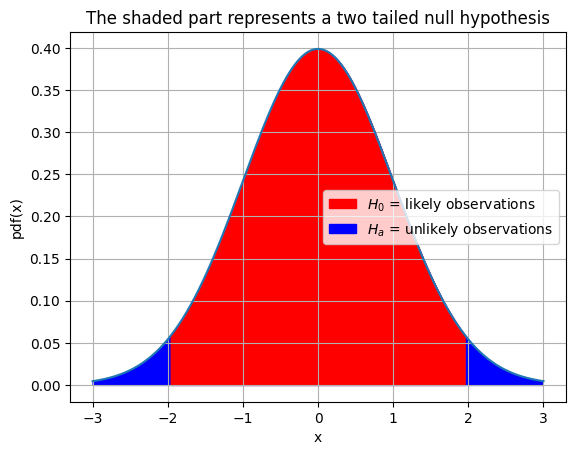

In [ ]:
# example of two tailed hypothesis
x = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()
ax.plot(x, stats.norm.pdf(x,loc=0,scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
stds = 1.96 # how many standard deviations from the mean
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
px=np.arange(-stds,stds,0.01)
ax.fill_between(px,stats.norm.pdf(px,loc=0,scale=1), color='r')
plt.title('The shaded part represents a two tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

In [ ]:
import scipy.stats as stats

# Z-distribution
confidence_level_z = 0.95
alpha_z = 1 - confidence_level_z
critical_value_z = stats.norm.ppf(1 - alpha_z / 2)
critical_value_z_right_tailed = stats.norm.ppf(1 - alpha_z)
critical_value_z_left_tailed = stats.norm.ppf(alpha_z)

print(f"Z-distribution critical value (95% confidence): ±{critical_value_z:.3f}")
print(f"Z-distribution critical value (95% CI, right-tailed): {critical_value_z_right_tailed:.3f}")
print(f"Z-distribution critical value (95% CI, left-tailed): {critical_value_z_left_tailed:.3f}")

# T-distribution (small sample, unknown population standard deviation)
confidence_level_t = 0.95
degrees_of_freedom = 19  # Example: sample size of 20 (n-1)
alpha_t = 1 - confidence_level_t
critical_value_t = stats.t.ppf(1 - alpha_t / 2, df=degrees_of_freedom)  # Two-tailed

degrees_of_freedom_one_tail = 19 #Example
confidence_level_t_one_tail = 0.95
alpha_t_one_tail = 1 - confidence_level_t_one_tail

critical_value_t_one_tail_right = stats.t.ppf(1-alpha_t_one_tail, df = degrees_of_freedom_one_tail)
critical_value_t_one_tail_left = stats.t.ppf(alpha_t_one_tail, df = degrees_of_freedom_one_tail)

print(f"T-distribution critical value (95% confidence, df={degrees_of_freedom}): ±{critical_value_t:.3f}")
print(f"T-distribution critical value, Right tail (95% confidence, df={degrees_of_freedom_one_tail}): {critical_value_t_one_tail_right:.3f}")
print(f"T-distribution critical value, Left tail (95% confidence, df={degrees_of_freedom_one_tail}): {critical_value_t_one_tail_left:.3f}")

Z-distribution critical value (95% confidence): ±1.960
Z-distribution critical value (95% CI, right-tailed): 1.645
Z-distribution critical value (95% CI, left-tailed): -1.645
T-distribution critical value (95% confidence, df=19): ±2.093
T-distribution critical value, Right tail (95% confidence, df=19): 1.729
T-distribution critical value, Left tail (95% confidence, df=19): -1.729


In [ ]:
import scipy.stats as stats

# Z-distribution (95% Confidence Interval)
confidence_level_z = 0.95
alpha_z = 1 - confidence_level_z

# Two-tailed test
critical_value_z_two_tailed = stats.norm.ppf(1 - alpha_z / 2)

print(f"Z-distribution critical values (95% CI, two-tailed): ±{critical_value_z_two_tailed:.3f}")

# One-tailed test (right-tailed)
critical_value_z_right_tailed = stats.norm.ppf(1 - alpha_z)

print(f"Z-distribution critical value (95% CI, right-tailed): {critical_value_z_right_tailed:.3f}")

# One-tailed test (left-tailed)
critical_value_z_left_tailed = stats.norm.ppf(alpha_z)

print(f"Z-distribution critical value (95% CI, left-tailed): {critical_value_z_left_tailed:.3f}")

Z-distribution critical values (95% CI, two-tailed): ±1.960
Z-distribution critical value (95% CI, right-tailed): 1.645
Z-distribution critical value (95% CI, left-tailed): -1.645


## z-Distribution vs. t-Distribution

**Key Differences**

* **Z-distribution:**
    * Used when you know the population standard deviation or when you have a very large sample size.
    * It's the standard normal distribution.
    * The critical value of 1.96 is a fixed value for a 95% confidence interval in a two-tailed z-distribution.
* **T-distribution:**
    * Used when you don't know the population standard deviation and you're working with a smaller sample size.
    * It accounts for the added uncertainty that comes with estimating the standard deviation from a sample.
    * The t-distribution's shape changes based on the "degrees of freedom," which are related to the sample size (typically, degrees of freedom = sample size - 1).
    * Therefore, the critical values for a t-distribution vary.

**Why the Variation?**

* **Degrees of Freedom:**
    * When you have a smaller sample size (fewer degrees of freedom), the t-distribution has heavier tails than the z-distribution. This means you need to go further out on the tails to capture the same level of confidence.
    * As the sample size increases (more degrees of freedom), the t-distribution approaches the z-distribution.
    * Therefore with smaller sample sizes the T distribution critical values will be larger than 1.96.
* **Example:**
    * If you have a small sample size, say 20, the critical t-value for a 95% confidence interval will be larger than 1.96 (like the 2.086 you mentioned).
    * If you had a very large sample size, the t-value would be very close to 1.96.

**In essence:**

* 1.96 is the correct critical value for a 95% confidence interval when using the z-distribution.
* Values like 2.086 are correct critical values for a 95% confidence interval when using the t-distribution, and the exact value depends on the degrees of freedom.

```python
import scipy.stats as stats

# Z-distribution (large sample or known population standard deviation)
confidence_level_z = 0.95
alpha_z = 1 - confidence_level_z
critical_value_z = stats.norm.ppf(1 - alpha_z / 2)  # Two-tailed

print(f"Z-distribution critical value (95% confidence): ±{critical_value_z:.3f}")

# T-distribution (small sample, unknown population standard deviation)
confidence_level_t = 0.95
degrees_of_freedom = 19  # Example: sample size of 20 (n-1)
alpha_t = 1 - confidence_level_t
critical_value_t = stats.t.ppf(1 - alpha_t / 2, df=degrees_of_freedom)  # Two-tailed

print(f"T-distribution critical value (95% confidence, df={degrees_of_freedom}): ±{critical_value_t:.3f}")

#One tailed T test.

degrees_of_freedom_one_tail = 19 #Example
confidence_level_t_one_tail = 0.95
alpha_t_one_tail = 1 - confidence_level_t_one_tail

critical_value_t_one_tail_right = stats.t.ppf(1-alpha_t_one_tail, df = degrees_of_freedom_one_tail)
critical_value_t_one_tail_left = stats.t.ppf(alpha_t_one_tail, df = degrees_of_freedom_one_tail)

print(f"T-distribution critical value, Right tail (95% confidence, df={degrees_of_freedom_one_tail}): {critical_value_t_one_tail_right:.3f}")
print(f"T-distribution critical value, Left tail (95% confidence, df={degrees_of_freedom_one_tail}): {critical_value_t_one_tail_left:.3f}")
```

**Explanation:**

1.  **Import `scipy.stats`:**
    * This library provides functions for statistical distributions.

2.  **Z-distribution:**
    * `stats.norm.ppf(1 - alpha_z / 2)`:
        * `stats.norm.ppf()` calculates the inverse cumulative distribution function (also called the quantile function) for the standard normal distribution.
        * `1 - alpha_z / 2` calculates the cumulative probability up to the critical value in the right tail (for a two-tailed test).
        * The result is the z-score.
    * The code then prints the positive and negative critical values.

3.  **T-distribution:**
    * `degrees_of_freedom`: This is set to 19 as an example (sample size of 20). Change this value according to your sample size.
    * `stats.t.ppf(1 - alpha_t / 2, df=degrees_of_freedom)`:
        * `stats.t.ppf()` calculates the inverse cumulative distribution function for the t-distribution.
        * `df=degrees_of_freedom` specifies the degrees of freedom.
    * The code prints the positive and negative critical t-values.

4.  **One tailed T-distribution:**
    * `stats.t.ppf(1-alpha_t_one_tail, df = degrees_of_freedom_one_tail)` calculates the critical value for a right tailed test.
    * `stats.t.ppf(alpha_t_one_tail, df = degrees_of_freedom_one_tail)` calculates the critical value for a left tailed test.
    * The code prints the critical t-values.

**Key points:**

* Remember to adjust the `degrees_of_freedom` variable in the t-distribution calculation to match your sample size.
* `ppf` is the percentile point function, also known as the inverse CDF. It gives you the value on the x-axis for a given cumulative probability.
* This code demonstrates how the critical values change when using the t-distribution compared to the z-distribution, especially with a smaller sample size.
